In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from konlpy.tag import Twitter 
from sklearn.cluster import KMeans

In [3]:
all = pd.DataFrame(index=range(0,176), columns=['region', 'info'])
all

,region,info
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
171,NaN,NaN
172,NaN,NaN
173,NaN,NaN
174,NaN,NaN


In [ ]:
#불러올 각 지역 csv파일
data=pd.read_csv("강릉_여행_140_네이버블로그_크롤링.csv",encoding="utf-8")
data

# ->위와 같은 식으로 각 지역에서 뽑아온 크롤링 데이터셋 csv를 data에 불러오는 반복 작업 시행

In [ ]:
#지역명과 all.iloc의 행만 +1씩 해가며 바꿔주기
all.iloc[0,0]="강릉/여행"
all.iloc[0,1]=data.iloc[0,0]
for i in range(1,490):
    all.iloc[0,1]=all.iloc[0,1] + data.iloc[i,0]
all.iloc[0,:]

In [4]:
data=pd.read_csv("네이버최종데이터셋.csv",encoding="utf-8")
data

,region,info
0,강원/강릉시,"[강원 강릉시]강릉여행, 가족 숙소 추천 오션뷰 '라카이 샌드파인 리조트, 트리오룸..."
1,강원/고성,[강원 고성 여행 '송지호해수욕장'/202011 고성 여행 2일차 PART3]4.9...
2,강원/동해,"[강원 동해시] 묵호등대, 등대오름길, 논골담길, 바람의 언덕, 묵호등대해양문화공간..."
3,강원/삼척,강원 삼척 여행 /쏠비치리조트 B동 패밀리클린룸[강원 삼척여행]안녕바다펜션에서 힐링...
4,강원/속초,"2021 5월 일기 4, 속초 여행 1박 2일5월 14-15일_고성, 속초 여행[속..."
...,...,...
171,충북/제천시,"충북 제천시 의림지&역사 박물관 여행 코스로 좋아요.충북 제천시 가볼만한 곳, 제천..."
172,충북/증평,"충북 증평 여행, 좌구산 분젓치 산새길 테마로드 트레킹 별천지 공원 출발충북 가볼만..."
173,충북/진천,충북 진천 여행 '초평저수지와 붕어마을'충북 여행 가볼만한곳 진천 농다리 초평저수지...
174,충북/청주,"충북 청주 여행, 수암골 벽화마을~충북 청주 여행-청남대겨울여행 : 충북 청주 빙판..."


In [5]:
data['info'] = data['info'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
data

<ipython-input-5-a61943e6bb8b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['info'] = data['info'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,region,info
0,강원/강릉시,강원 강릉시강릉여행 가족 숙소 추천 오션뷰 라카이 샌드파인 리조트 트리오룸강원 강릉...
1,강원/고성,강원 고성 여행 송지호해수욕장 고성 여행 일차 강원고성여행강원 고성 맛집 갈때마다...
2,강원/동해,강원 동해시 묵호등대 등대오름길 논골담길 바람의 언덕 묵호등대해양문화공간동해 가볼만...
3,강원/삼척,강원 삼척 여행 쏠비치리조트 동 패밀리클린룸강원 삼척여행안녕바다펜션에서 힐링하고 왔...
4,강원/속초,월 일기 속초 여행 박 일월 일고성 속초 여행속초 여행 속초 밤하늘글램핑 개별...
...,...,...
171,충북/제천시,충북 제천시 의림지역사 박물관 여행 코스로 좋아요충북 제천시 가볼만한 곳 제천여행에...
172,충북/증평,충북 증평 여행 좌구산 분젓치 산새길 테마로드 트레킹 별천지 공원 출발충북 가볼만한...
173,충북/진천,충북 진천 여행 초평저수지와 붕어마을충북 여행 가볼만한곳 진천 농다리 초평저수지 벚...
174,충북/청주,충북 청주 여행 수암골 벽화마을충북 청주 여행청남대겨울여행 충북 청주 빙판 빙어낚...


In [7]:
# 3. 형태소 분석
twitter = Twitter()
morphs = []
num=0
tokenized_data = []
for sentense in data.iloc[:,1]:
    morphs = []
    morphs.append(twitter.pos(sentense))
    noun_adj_adv_list=[] 
    for sentence in morphs : 
        for word, tag in sentence : 
            if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word) and ("등" not in word) and ("제" not in word) and ("륙" not in word)and ("끼" not in word)and ("인천" not in word)and ("강원" not in word)and ("충북" not in word)and ("충남" not in word)and ("충청" not in word)and ("전북" not in word)and ("전남" not in word)and ("전라" not in word)and ("경북" not in word)and ("경남" not in word)and ("경상" not in word)and ("도" not in word)and ("대전" not in word)and ("대구" not in word)and ("광주" not in word)and ("부산" not in word)and ("울산" not in word)and ("여행" not in word)and ("추천" not in word)and ("일차" not in word)and ("전국" not in word)and ("근처" not in word)and ("박일" not in word)and ("소개" not in word)and ("시간" not in word)and ("오늘" not in word)and ("후기" not in word)and ("정보" not in word)and ("인생" not in word)and ("타고" not in word)and ("빌라" not in word)and ("베스트" not in word)and ("비대" not in word)and ("택트" not in word)and ("최고" not in word)and ("위치" not in word)and ("방문" not in word)and ("주차" not in word)and ("가기" not in word): 
                noun_adj_adv_list.append(word)
        tokenized_data.append(noun_adj_adv_list)
    s=" ".join(noun_adj_adv_list)
    data.iloc[num,1]=s
    num=num+1
    
data

C:\Users\ecopl\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


,region,info
0,강원/강릉시,강릉시 강릉 가족 숙소 오션 뷰 라카 샌드파 리조트 트리오 룸 강릉시 보헤미안 박 ...
1,강원/고성,고성 송지호 고성 고성 고성 맛집 때 고성 당일치기 고성 김일성 별장 화진포 의성 ...
2,강원/동해,동해시 묵호 논골 바람 언덕 묵호 해양 화공 곳 강릉 동해시 겨울 바다 동해 동해시...
3,강원/삼척,삼척 쏠 비치 리조트 패밀리 클린룸 삼척 안녕바다 펜션 힐링 삼척 종합 박물관 삼척...
4,강원/속초,월 일기 속초 박 일월 고성 속초 속초 속초 밤하늘 글램핑 개별 화장실 샤워실 속초...
...,...,...
171,충북/제천시,의림지 역사 박물관 코스 곳 핫 레이스 의림지 감악산 백련사 봉양읍 명암 리 감악산...
172,충북/증평,증평 좌 구산 분 산새 길 테마로드 트레킹 별천지 공원 출발 곳 증평 루지 증평 코...
173,충북/진천,진천 초평 붕어 마을 곳 진천 농다리 초평 벚꽃 엔딩 진천 김유신 장군 사당 길상사...
174,충북/청주,청주 골 벽화 마을 청주 청남대 겨울 청주 빙판 빙어 낚시 유호정 낚시터 꿀팁 청주...


In [8]:
list=data.iloc[:,1].values
list=list.tolist()

In [9]:
#TF-IDF벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer(max_features=50,min_df=0.3,analyzer='word').fit(list)
X=tfidfv.transform(list)
print(tfidfv.vocabulary_)

{'가족': 1, '숙소': 26, '리조트': 15, '커피': 39, '카페': 36, '맛집': 17, '당일치기': 12, '식당': 28, '박물관': 21, '호텔': 48, '공원': 7, '바다': 20, '산책': 24, '해변': 47, '거리': 3, '문화': 19, '체험': 35, '여름': 30, '테마': 41, '코스': 40, '드라이브': 14, '전망대': 33, '시장': 27, '투어': 42, '생태': 25, '자연': 32, '펜션': 44, '다리': 11, '감성': 2, '사진': 23, '힐링': 49, '관광지': 9, '아이': 29, '관광': 8, '겨울': 4, '파크': 43, '벚꽃': 22, '명소': 18, '데이트': 13, '골프': 6, '마을': 16, '캠핑장': 38, '계곡': 5, '한국': 46, '가을': 0, '풍경': 45, '정원': 34, '역사': 31, '근교': 10, '캠핑': 37}


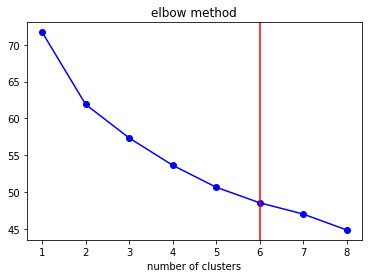

In [11]:
#크롤링 데이터 군집화 엘보우

def elbow(data1, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data1)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.axvline(x=6,c='red')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.show()
elbow(X, 9)

In [13]:
# K-means로 6개 군집으로 문서 군집화시키기
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, max_iter=1000, random_state=101)

cluster_label = kmeans.fit_predict(X)

# 군집화한 레이블값들을 df 에 추가하기
data['cluster_label'] = cluster_label
print(data.sort_values(by=['cluster_label']))

     region                                               info  cluster_label
29    경남/창녕  창녕 창녕 랜선 자연 생태 그대로 창녕 우포늪 체험 가족 창녕 바오 펜션 창녕 미식...              0
168   충북/영동  영동 강 줄기 월류봉 둘레길 영동 명소 자 서당 영동 상촌면 맛집 청학동 자연 산 ...              0
150   충남/계룡  계룡시 당일치기 코스 동학사 맛집 샤브 마름 샤브샤브 계룡 계룡시 사계 고택 계룡시...              0
30    경남/창원  창원 자전거 봉하마을 남 동판 창원시 창원시 집 창원 창원 곳 창원시 굴집 맛 남자...              0
133   전남/화순  곳 화순 캠핑장 숲속 베리 화순 곳 적벽 포함 화순 곳 연사 구리 공원 포함 코스 ...              0
..      ...                                                ...            ...
142  전북/익산시  익산시 스탬프 투어 천리 길 익산시 맞춤 시티투어 버스 운행 익산시 길 반점 지역 ...              5
114   전남/곡성  곡성 드라이브 코스 섬진강 철쭉 길 곡성 황강 매화 꽃 걷기 곡성 장미꽃 만발 섬진...              5
115  전남/광양시  파트너 광양시 봄맞이 광양시 대한민국 테마 선 권역 공동 프로모션 포스트 랜선 광양...              5
116   전남/구례  구례 봄 활짝 핀 지리산 치즈 랜드 봄꽃 구례 윤 스테이 속 쌍 산재 관리 및 유지...              5
151   충남/공주  공주 계룡산 갑사 자연 경관 사찰 공주 동학사 꽃 꽃 구경 꼭 가야 짬뽕 동해 공주...              5

[176 rows x 3 columns]


In [14]:
data.cluster_label.value_counts()

3    57
0    38
2    38
5    25
4    10
1     8
Name: cluster_label, dtype: int64

In [16]:
plt.rc('font', family='NanumGothic')

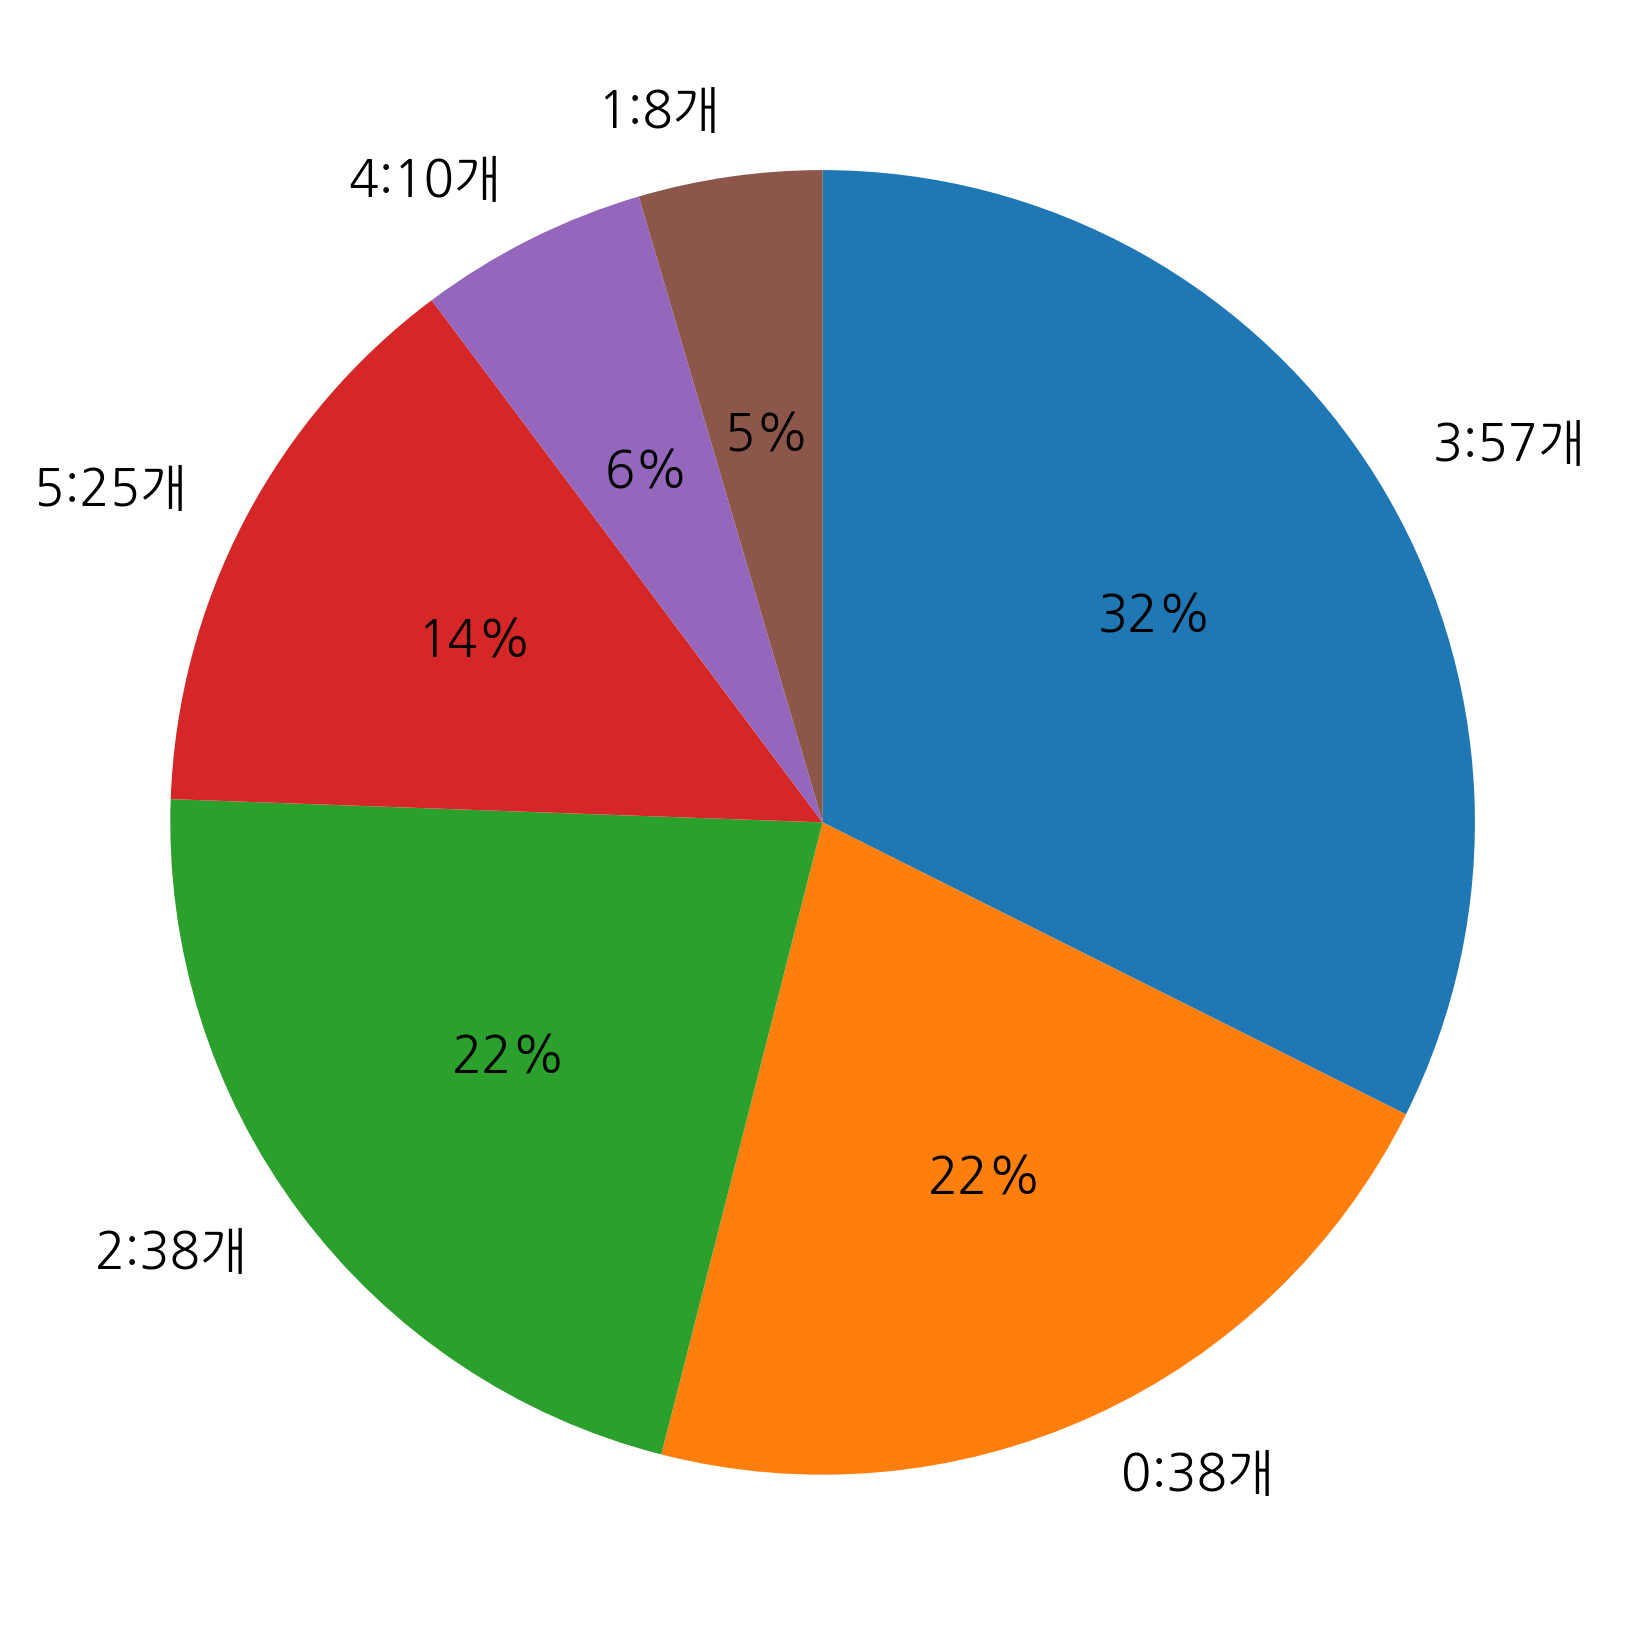

In [17]:
#테마군집 파이차트 시각화
ratio=data.cluster_label.value_counts()
pie_label=['3:57개','0:38개','2:38개','5:25개','4:10개','1:8개']
#explode = [0, 0.20, 0.20, 0.10,0,0]
plt.figure(figsize=(30,30))
plt.pie(ratio,labels=pie_label,autopct='%1.f%%', startangle=90,counterclock=False)
plt.rcParams['font.size'] = 50

In [18]:
centers = kmeans.cluster_centers_
vocabs = [vocab for vocab, idx in sorted(tfidfv.vocabulary_.items(), key=lambda x:x[1])]
from soyclustering import proportion_keywords
keywords = proportion_keywords(
    centers,
    labels=cluster_label,
    index2word=vocabs)
for i in  [0,1,2,3,4,5]:
    print("cluster",i)
    print(keywords[i])
    print("\n")

cluster 0
[('근교', 0.805488064031667), ('생태', 0.7325423489641797), ('다리', 0.7114275420808147), ('테마', 0.709898562007486), ('벚꽃', 0.6801728868569398), ('캠핑장', 0.6452632356780189), ('파크', 0.6434048890467852), ('자연', 0.6389298676504812), ('공원', 0.6363350788150663), ('드라이브', 0.6276196372674159), ('캠핑', 0.6244777664192879), ('풍경', 0.6115031762401013), ('계곡', 0.6070016687759172), ('산책', 0.6033133914009972), ('가을', 0.5926694671736977), ('사진', 0.588721587402935), ('아이', 0.5799832537879244), ('여름', 0.5702138815791415), ('힐링', 0.5616288408142903), ('체험', 0.5448074322259447), ('데이트', 0.5424480249144406), ('명소', 0.5314942720232719), ('역사', 0.5305500644662954), ('가족', 0.5117125682543805), ('당일치기', 0.5057009467820957)]


cluster 1
[('골프', 0.9489707780931239), ('박물관', 0.7075883953802686), ('리조트', 0.7073030956124998), ('역사', 0.6653374220937316), ('겨울', 0.6517820652962968), ('커피', 0.6310919272416468), ('테마', 0.6178438038903841), ('드라이브', 0.6005977295297864), ('관광', 0.5490082408706628), ('관광지', 0.5469655

In [19]:
#단어벡터화 df생성
tfidf_dict = tfidfv.get_feature_names()
data_array = X.toarray()
tfidf_df=pd.DataFrame(data=data_array,columns=tfidf_dict,)
tfidf_df['region']=data.region
col1=tfidf_df.columns[-1:].to_list()
col2=tfidf_df.columns[:-1].to_list()
new_col=col1+col2
tfidf_df=tfidf_df[new_col]
tfidf_df['cluster_label']=data.cluster_label
tfidf_df

,region,가을,가족,감성,거리,겨울,계곡,골프,공원,관광,...,테마,투어,파크,펜션,풍경,한국,해변,호텔,힐링,cluster_label
0,강원/강릉시,0.005153,0.055098,0.027113,0.070095,0.036896,0.007612,0.008461,0.039175,0.030395,...,0.011032,0.030224,0.006227,0.135134,0.005331,0.011096,0.511680,0.212022,0.049807,2
1,강원/고성,0.004885,0.056990,0.030849,0.005112,0.024987,0.000000,0.088242,0.018572,0.014410,...,0.005230,0.019104,0.000000,0.211687,0.010109,0.000000,0.610613,0.042321,0.028334,2
2,강원/동해,0.014531,0.037669,0.040780,0.010137,0.019819,0.064401,0.000000,0.009207,0.047621,...,0.005185,0.028412,0.000000,0.033139,0.010023,0.026076,0.199035,0.089165,0.018728,3
3,강원/삼척,0.016412,0.119656,0.008636,0.008587,0.058759,0.060614,0.026949,0.116981,0.024203,...,0.026355,0.072201,0.019834,0.280710,0.025470,0.070682,0.252896,0.088858,0.047592,2
4,강원/속초,0.007545,0.007335,0.047644,0.023687,0.054027,0.000000,0.000000,0.078878,0.096436,...,0.008078,0.029505,0.018237,0.043018,0.046838,0.000000,0.129184,0.179746,0.029173,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,충북/제천시,0.079836,0.077609,0.025206,0.025063,0.065333,0.082560,0.000000,0.098636,0.376758,...,0.017094,0.093658,0.009648,0.072827,0.074339,0.137532,0.000000,0.008645,0.324118,3
172,충북/증평,0.064087,0.124599,0.013489,0.040238,0.013111,0.075741,0.115756,0.243626,0.025203,...,0.013722,0.012531,0.015490,0.036538,0.019892,0.006900,0.000000,0.013879,0.037169,3
173,충북/진천,0.045848,0.124794,0.048251,0.009595,0.037520,0.040639,0.075284,0.278866,0.018030,...,0.029450,0.017929,0.000000,0.062735,0.028461,0.000000,0.000000,0.129081,0.132954,0
174,충북/청주,0.129816,0.042065,0.045540,0.072451,0.035412,0.012785,0.113687,0.148049,0.051052,...,0.009265,0.033843,0.000000,0.148026,0.017908,0.027954,0.000000,0.140572,0.050193,0


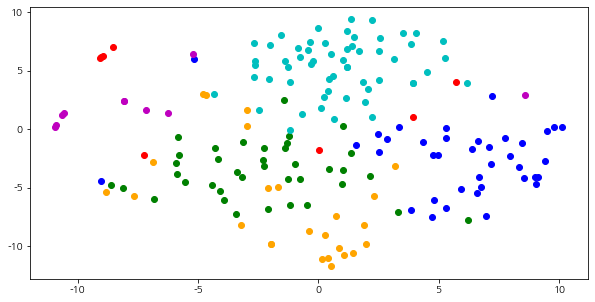

In [86]:
# 지역 군집화 차원축소 시각화
from sklearn.manifold import TSNE
import matplotlib

index0=tfidf_df[tfidf_df.cluster_label==0].index
index1=tfidf_df[tfidf_df.cluster_label==1].index
index2=tfidf_df[tfidf_df.cluster_label==2].index
index3=tfidf_df[tfidf_df.cluster_label==3].index
index4=tfidf_df[tfidf_df.cluster_label==4].index
index5=tfidf_df[tfidf_df.cluster_label==5].index

matplotlib.rcParams['axes.unicode_minus'] = False
model = TSNE(learning_rate=5, random_state=101)
transformed = model.fit_transform(X)
xs0 = transformed[index0][:,0]
ys0 = transformed[index0][:,1]
xs1 = transformed[index1][:,0]
ys1 = transformed[index1][:,1]
xs2 = transformed[index2][:,0]
ys2 = transformed[index2][:,1]
xs3 = transformed[index3][:,0]
ys3 = transformed[index3][:,1]
xs4 = transformed[index4][:,0]
ys4 = transformed[index4][:,1]
xs5 = transformed[index5][:,0]
ys5 = transformed[index5][:,1]

#plt.rcParams['font.size'] = 10
plt.figure(figsize=(10,5))
plt.scatter(xs0,ys0,c='g')
plt.scatter(xs1,ys1,c='r')
plt.scatter(xs2,ys2,c='b')
plt.scatter(xs3,ys3,c='c')
plt.scatter(xs4,ys4,c='m')
plt.scatter(xs5,ys5,c='orange')
plt.show()